In [ ]:
!pip install rasterio
import rasterio as ro

In [3]:
pre_DSM_data = ro.open("pre_DSM.tif")
pre_DTM_data = ro.open("pre_DTM.tif")

In [4]:
#number of bands per dataset
pre_DSM_data.count
pre_DTM_data.count

1

In [ ]:
#heights and widths of each dataset

In [5]:
DTM_hw = (pre_DTM_data.height, pre_DTM_data.width)
DTM_hw

(2000, 4000)

In [6]:
DSM_hw = (pre_DSM_data.height, pre_DSM_data.width)
DSM_hw

(2000, 4000)

In [ ]:
#Plots of both datasets

In [7]:
from rasterio.plot import show

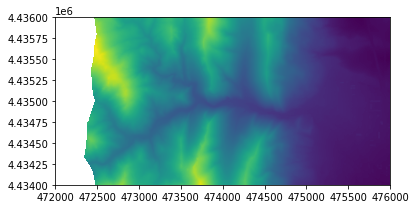

In [8]:
show(pre_DTM_data)

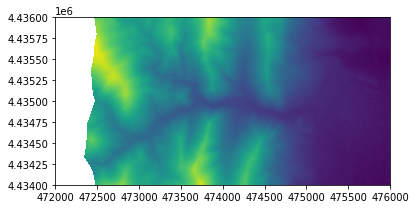

In [9]:
show(pre_DSM_data)

In [10]:
dtm_data = pre_DTM_data.read(1, masked=True)

In [11]:
dsm_data = pre_DSM_data.read(1, masked=True)

In [12]:
heights = dsm_data - dtm_data

In [ ]:
#what are the max and min heights

In [13]:
import numpy as np

In [14]:
np.max(heights)

26.930054

In [15]:
np.min(heights)

0.0

In [ ]:
#creating a histogram

In [1]:
import matplotlib.pyplot as plt

(array([5.69269e+06, 4.26245e+05, 3.26238e+05, 2.70872e+05, 1.95188e+05,
        1.21300e+05, 7.01040e+04, 3.45250e+04, 1.40440e+04, 4.85100e+03,
        1.31400e+03, 3.03000e+02, 5.00000e+01, 4.00000e+00, 0.00000e+00]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
 <a list of 15 Patch objects>)

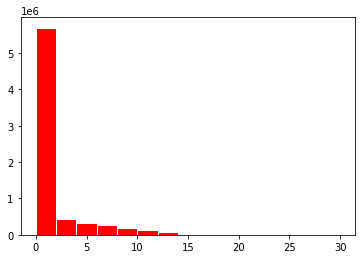

In [16]:
plt.hist(heights.ravel(), bins=range(0,31,2), color="red", edgecolor="white")

In [ ]:
#reclassifying data

In [17]:
bin_h = ([2, 7, 12, np.inf])

reclass = np.digitize(heights, bin_h, right=True)

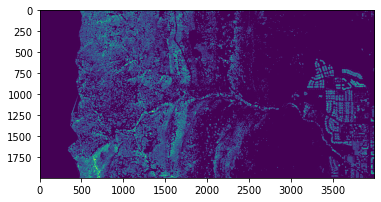

In [18]:
show(reclass)

In [ ]:
#saving the relass as a new file

In [31]:
reclass_lab3 = ro.open("lab3_reclass.tif", "w", driver="GTiff",
                     width=pre_DSM_data.width, 
                     height=pre_DSM_data.height,
                     count=1,
                     crs=pre_DSM_data.crs,
                     transform=pre_DSM_data.transform,
                     dtype=dsm_data.dtype
                     )
reclass_lab3.write(reclass, 1)
reclass_lab3.close()